## Exploratory Plots

This notebook is for creating exploratory plots and is intended for someone to change the filenames and be able to produce the same plots.

Change file names for Fis, Ho, and  He files from hierfstat here:

In [12]:
str_filename = "cragig_lanes_12_002_biall_maf_inames_onesnp_fpop.str"
fis_filename = "Fis_cragig_lanes_12_002_20170623_fpop.txt"
ho_filename = "Ho_cragig_lanes_12_002_20170623_fpop.txt"
hs_filename = "Hs_cragig_lanes_12_002_20170623_fpop.txt"

In [2]:
cd /mnt/hgfs/SHARED_FOLDER/Learn_iPyrad/CRAGIG_RUNS_12_py/cragig_lanes_12_002_outfiles/new_outfiles/

/mnt/hgfs/SHARED_FOLDER/Learn_iPyrad/CRAGIG_RUNS_12_py/cragig_lanes_12_002_outfiles/new_outfiles


In [3]:
vcf_file = open("cragig_lanes_12_002_biall_maf.recode.vcf","r") # change!
vcf_file_lines = vcf_file.readlines()
vcf_file.close()

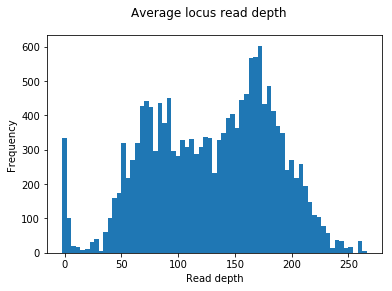

In [4]:
locus_names = {}
snp_name_count = 1

for line in vcf_file_lines:
    if line[0] != "#":
        linelist = line.strip().split()
        locus = linelist[0]
        pos = linelist[1]
        vcf_locus_name = locus + "_" + pos
        str_locus_name = "SNP_" + str(snp_name_count)
        snp_name_count += 1
        locus_names[str_locus_name] = vcf_locus_name  

sample_list = []
snp_name_list = []
rdd = {} 

for line in vcf_file_lines:
    if line[0:1] == "#C":
        linelist = line.strip().split()
        sample_list += linelist[9:]
    elif line[0] != "#": # ignore header lines
        genblocks = line.strip().split()
        snp_name = genblocks[0] + "_" + genblocks[1] # name formate.g., locus_47_1
        snp_name_list.append(snp_name)
        for genblock in genblocks[9:]: # start on genotype lines
            genblocklist = genblock.split(":")
            rd = int(genblocklist[1])
            if snp_name not in rdd:
                rdd[snp_name] = [rd]
            elif snp_name in rdd:
                rdd[snp_name] += [rd]
            else:
                print "something funky going on"

import matplotlib.pyplot as plt
import numpy as np

locus_rd_avs = []
for snp in snp_name_list:
    locus_rd_avs.append(np.mean(rdd[snp]))
    
plt.hist(locus_rd_avs, bins = np.arange(0,max(locus_rd_avs),4)-2)
plt.suptitle("Average locus read depth")
plt.xlabel("Read depth")
plt.ylabel("Frequency")
plt.show()

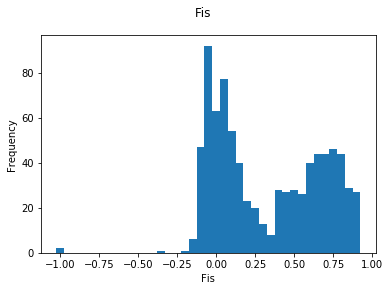

In [30]:
fis_file = open(fis_filename,"r")
fis_file_lines = fis_file.readlines()
fis_file.close()

fis_list = []
fis_pls_NAs = []

for line in fis_file_lines[1:]:
    fis = line.strip().split()[1]
    fis_pls_NAs.append(fis)
    if fis != "NA":
        fis_list.append(float(fis))
    
plt.hist(fis_list, bins = np.arange(-1,1,.05)-.025)
plt.suptitle("Fis")
plt.xlabel("Fis")
plt.ylabel("Frequency")
plt.show()

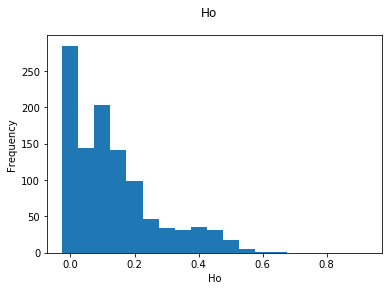

In [40]:
ho_file = open(ho_filename,"r")
ho_file_lines = ho_file.readlines()
ho_file.close()

ho_list = []
ho_and_NAs = []

for line in ho_file_lines[1:]:
    ho = line.strip().split()[1]
    ho_and_NAs.append(ho)
    if ho != "NA":
        ho_list.append(float(ho))
    
plt.hist(ho_list, bins = np.arange(min(ho_list),max(ho_list),.05)-.025)
plt.suptitle("Ho")
plt.xlabel("Ho")
plt.ylabel("Frequency")
plt.show()

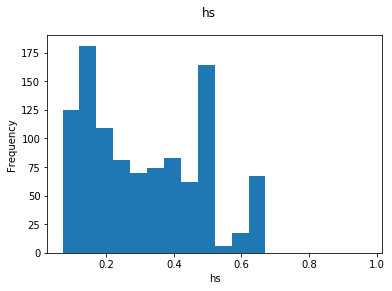

In [41]:
hs_file = open(hs_filename,"r")
hs_file_lines = hs_file.readlines()
hs_file.close()

hs_list = []
hs_and_NAs = []

for line in hs_file_lines[1:]:
    hs = line.strip().split()[1]
    hs_and_NAs.append(hs)
    if hs != "NA":
        hs_list.append(float(hs))
    
plt.hist(hs_list, bins = np.arange(min(hs_list),max(hs_list),.05)-.025)
plt.suptitle("hs")
plt.xlabel("hs")
plt.ylabel("Frequency")
plt.show()

## Read depth vs. Fis, Ho, Hs, etc.

In [44]:
str_file = open(str_filename, "r")
str_header = str_file.readline()
str_file.close()
str_loci = str_header.strip().split()
match_loci_inds = [i for i, x in enumerate(snp_name_list) if x in str_loci]
rds_filt_all = []
for ind in match_loci_inds:
    rds_filt_all.append(locus_rd_avs[ind])    
match_loci_inds_notNA_fis = [i for i, x in enumerate(fis_pls_NAs) if x != "NA"]
rds_for_fis = []
for ind in match_loci_inds_notNA_fis:
    rds_for_fis.append(locus_rd_avs[ind])
match_loci_inds_notNA_ho = [i for i, x in enumerate(ho_and_NAs) if x != "NA"]
rds_for_ho = []
for ind in match_loci_inds_notNA_ho:
    rds_for_ho.append(locus_rd_avs[ind]) 
match_loci_inds_notNA_hs = [i for i, x in enumerate(hs_and_NAs) if x != "NA"]
rds_for_hs = []
for ind in match_loci_inds_notNA_hs:
    rds_for_hs.append(locus_rd_avs[ind])

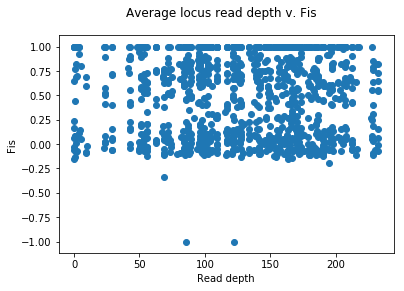

In [38]:
plt.scatter(rds_for_fis, fis_list)
plt.suptitle("Average locus read depth v. Fis")
plt.xlabel("Read depth")
plt.ylabel("Fis")
plt.show()

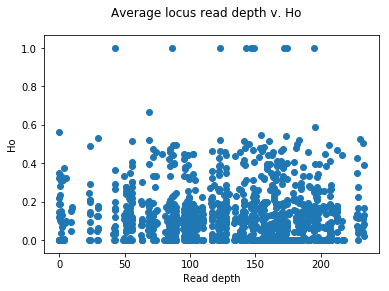

In [46]:
plt.scatter(rds_for_ho, ho_list)
plt.suptitle("Average locus read depth v. Ho")
plt.xlabel("Read depth")
plt.ylabel("Ho")
plt.show()

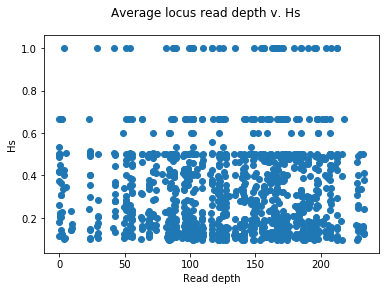

In [47]:
plt.scatter(rds_for_hs, hs_list)
plt.suptitle("Average locus read depth v. Hs")
plt.xlabel("Read depth")
plt.ylabel("Hs")
plt.show()